In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import torch
from pathlib import Path
import pandas as pd
import numpy as np
import scipy.stats as stats
import os

ROOT = Path("")

# 1. Model Transferability - Do attacks transfer?

In [2]:
zoo_path = ROOT.joinpath("/netscratch2/dtaskiran/zoos/CIFAR10/large/analysis_data_hyp_fix.pt")

ds = torch.load(zoo_path)

In [3]:
# Getting only the 50th epoch's results
a = 0
index_list = [50]
path_list = []
for i in range(len(ds["paths"])):
    if i == 0:
        aux = ds["paths"][i]
        path_list.append(ds["paths"][i])
    
    if ds["paths"][i] == aux:
        pass
    else: 
        a +=1 
        index_list.append(i+50)
        aux = ds["paths"][i]
        path_list.append(aux)

In [206]:
paths_short = []
for i in range(len(path_list)):
    path_list[i] = path_list[i].__str__().split("/")[-1]
    paths_short.append(path_list[i].split("_")[5])

In [207]:
acc_list = []
for index in index_list:
    acc_list.append(ds["acc"][index])

In [208]:
print(len(acc_list))
print(len(path_list))

1280
1280


In [12]:
df = pd.read_csv("../../data/all_results.csv")

In [227]:
data = pd.DataFrame()
data["name"] = paths_short
data["normal_zoo"] = acc_list

In [239]:
# Getting only the results from the CIFAR10 hyp-10-fix zoo
mnist_df = df[df["dataset"] == "CIFAR10"]
mnist_df = mnist_df[mnist_df["attack"] == "FGSM"]
mnist_df = mnist_df[mnist_df.setup == "hyp-10-f"]
mnist_df = mnist_df[mnist_df["eps"] == 0.5]
small_df = mnist_df[mnist_df["name"].isin(path_list)].reset_index(drop=True)
small_df.sort_values(by="name", key=lambda column:column.map(lambda e: path_list.index(e)), inplace=True)
small_df = small_df.reset_index(drop=True)

In [240]:
data["eps_0.5"] = small_df["new_acc"]

In [246]:
# Get the names of the models used for image generation
model_list_path = ROOT.joinpath("/netscratch2/jlautz/model_robustness/src/model_robustness/data/CIFAR10/large/FGSM/hyp-10-f")

with open(os.path.join(model_list_path, "model_list.txt"), "r") as items:
    model_paths = items.readlines()
    
    for i, l in enumerate(model_paths):
        model_paths[i] = l.replace("\n", "")

In [247]:
short_models_gen = []
for i in range(len(model_paths)):
    short_models_gen.append(model_paths[i].split("_")[5])

In [248]:
ind = []
for i in range(len(data)):
    if data.iloc[i,0] in short_models_gen:
        ind.append(1)
    else:
        ind.append(0)
data["gen"] = ind

<Axes: xlabel='normal_zoo', ylabel='eps_0.1'>

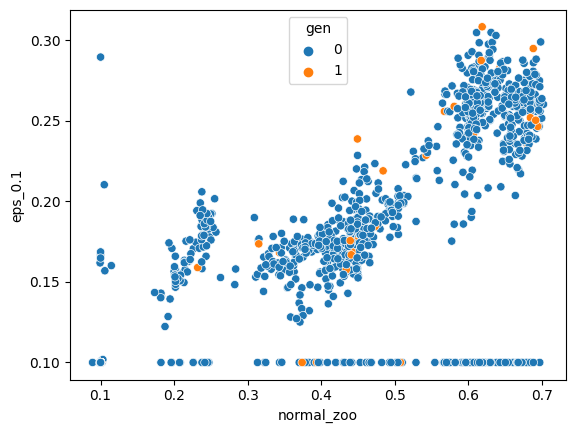

In [250]:
# Scatterplot
sns.scatterplot(data=data, x="normal_zoo", y="eps_0.1", hue="gen")

In [252]:
d = pd.DataFrame(columns=["name", "accuracy", "setup", "gen"])
groups = ["normal", "0.1", "0.2", "0.3", "0.4", "0.5"]
old_names = ["normal_zoo", "eps_0.1", "eps_0.2", "eps_0.3", "eps_0.4", "eps_0.5"]

for i, elem in enumerate(groups):
    aux = pd.DataFrame()
    aux["name"] = data["name"]
    aux["accuracy"] = data[old_names[i]]
    aux["setup"] = elem
    aux["gen"] = data["gen"]
    
    d = pd.concat([d, aux])

<Axes: xlabel='accuracy', ylabel='setup'>

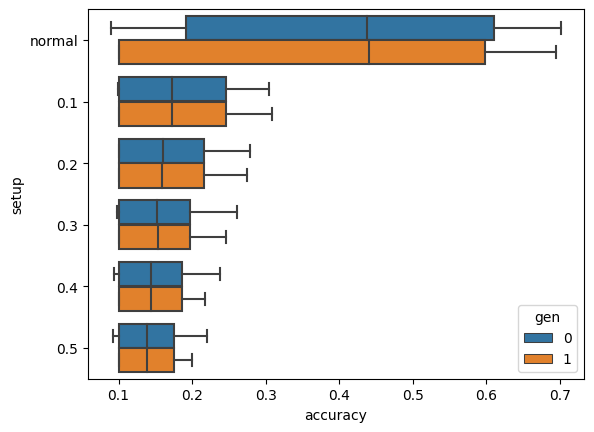

In [253]:
sns.boxplot(data=d, x="accuracy", y="setup", hue="gen")

## Plotting delta against accuracy

In [68]:
df = pd.read_csv("../../data/all_results.csv")

In [69]:
for i in range(len(df)):
    df.loc[i, "delta"] = df.loc[i, 'old_acc'] - df.loc[i, "new_acc"]

In [70]:
data = pd.DataFrame()
data["name"] = paths_short
data["normal_zoo"] = acc_list

In [71]:
# Getting only the results from the CIFAR10 hyp-10-fix zoo
mnist_df = df[df["dataset"] == "CIFAR10"]
mnist_df = mnist_df[mnist_df["attack"] == "PGD"]
mnist_df = mnist_df[mnist_df.setup == "hyp-10-f"]
mnist_df = mnist_df[mnist_df["eps"] == 0.1]
small_df = mnist_df[mnist_df["name"].isin(path_list)].reset_index(drop=True)
small_df.sort_values(by="name", key=lambda column:column.map(lambda e: path_list.index(e)), inplace=True)
small_df = small_df.reset_index(drop=True)

In [73]:
data["delta"] = small_df["delta"]

In [75]:
ind = []
for i in range(len(data)):
    if data.iloc[i,0] in short_models_gen:
        ind.append(1)
    else:
        ind.append(0)
data["gen"] = ind

<Axes: xlabel='normal_zoo', ylabel='delta'>

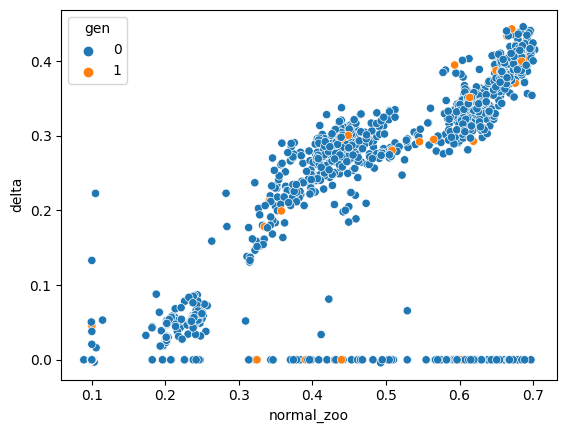

In [77]:
# Scatterplot
sns.scatterplot(data=data, x="normal_zoo", y="delta", hue="gen")

In [79]:
data.head()

,name,normal_zoo,delta,gen
0,215,0.1000,0.0000,0
1,275,0.1000,0.0000,0
2,957,0.3841,0.2211,0
3,156,0.6113,0.2813,0
4,962,0.6395,0.3357,0


## Compare PGD & FGSM attacks for SVHN zoo

In [254]:
zoo_path = ROOT.joinpath("/netscratch2/dtaskiran/zoos/SVHN/analysis_data_hyp_fix.pt")

ds = torch.load(zoo_path)

In [255]:
df = pd.read_csv("../../data/all_results.csv")

In [256]:
# Getting only the 50th epoch's results
a = 0
index_list = [50]
path_list = []
for i in range(len(ds["paths"])):
    if i == 0:
        aux = ds["paths"][i]
        path_list.append(ds["paths"][i])
    
    if ds["paths"][i] == aux:
        pass
    else: 
        a +=1 
        index_list.append(i+50)
        aux = ds["paths"][i]
        path_list.append(aux)
        
        
paths_short = []
for i in range(len(path_list)):
    path_list[i] = path_list[i].__str__().split("/")[-1]
    paths_short.append(path_list[i].split("_")[5])
    
    
acc_list = []
for index in index_list:
    acc_list.append(ds["acc"][index])

In [282]:
# Define parameters
attack = "FGSM"
data_path = "SVHN"
dataset = "SVHN"
setup = "hyp-10-f"

In [283]:
model_list_path = os.path.join(f"../../data/{data_path}/{attack}/{setup}/model_list.txt")

In [284]:
with open(model_list_path, "r") as items:
    model_paths = items.readlines()

    for i, l in enumerate(model_paths):
        model_paths[i] = l.replace("\n", "")

In [285]:
temp_df = df[df["dataset"] == dataset]
temp_df = temp_df[temp_df["attack"] == attack]
temp_df = temp_df[temp_df.setup == setup]
temp_df = temp_df[temp_df["eps"] == 0.1]

In [286]:
including = temp_df[temp_df["name"].isin(model_paths)]

In [288]:
fgsm = pd.DataFrame()
fgsm["accuracy"] = including["old_acc"]

In [289]:
stats.kstest(fgsm["accuracy"], pgd["accuracy"])

KstestResult(statistic=0.12, pvalue=0.8692618870414056)

In [11]:
# loading in the SVHN zoo
checkpoint_path = ROOT.joinpath("/netscratch2/dtaskiran/zoos/SVHN/tune_zoo_svhn_hyperparameter_10_fixed_seeds")
data_root = ROOT.joinpath("/netscratch2/jlautz/model_robustness/src/model_robustness/data/SVHN")
data_path = checkpoint_path.joinpath("dataset.pt")
zoo_path = ROOT.joinpath("/netscratch2/dtaskiran/zoos/SVHN/analysis_data_hyp_fix.pt")

In [12]:
# Load in the zoo to see which model was the best performing one
zoo = torch.load(zoo_path)

In [13]:
# Get the best performing model from zoo

# Getting only the 50th epoch's results
a = 0
index_list = [50]
path_list = []
for i in range(len(zoo["paths"])):
    if i == 0:
        aux = zoo["paths"][i]
        path_list.append(zoo["paths"][i])
    
    if zoo["paths"][i] == aux:
        pass
    else: 
        a +=1 
        index_list.append(i+50)
        aux = zoo["paths"][i]
        path_list.append(aux)
        
for i in range(len(path_list)):
    path_list[i] = path_list[i].__str__().split("/")[-1]

# Get all accuracies
acc_list = []
for index in index_list:
    acc_list.append(zoo["acc"][index])
    
# Get the index of max element 
max_index = acc_list.index(max(acc_list))

# Get the corresponding model name
best_model_path = path_list[max_index]

In [14]:
best_model_path

'NN_tune_trainable_88eea_02658_2658_model::dropout=0.0,model::init_type=kaiming_uniform,model::nlin=relu,optim::lr=0.001,optim::wd=_2021-08-18_21-26-15'

In [4]:
df = pd.read_csv("../../data/all_results.csv")

In [5]:
df.head()

,Unnamed: 0,name,dataset,attack,setup,eps,dropout,init_type,nlin,lr,momentum,optimizer,wd,seed,old_loss,old_acc,new_loss,new_acc
0,0,NN_tune_trainable_a17ed_00710_710_model::dropo...,MNIST,PGD,hyp-10-r,0.1,0.0,kaiming_normal,tanh,0.0010,0.9,sgd,0.0001,674695,0.067,0.979,0.378464,0.3051
1,1,NN_tune_trainable_a17ed_00686_686_model::dropo...,MNIST,PGD,hyp-10-r,0.1,0.0,kaiming_normal,relu,0.0001,0.9,adam,0.0001,486815,0.054,0.984,0.056045,0.8454
2,2,NN_tune_trainable_a17ed_01002_1002_model::drop...,MNIST,PGD,hyp-10-r,0.1,0.0,normal,relu,0.0001,0.9,sgd,0.0001,162638,2.301,0.113,0.230108,0.1135
3,3,NN_tune_trainable_a17ed_00775_775_model::dropo...,MNIST,PGD,hyp-10-r,0.1,0.5,kaiming_normal,tanh,0.0010,0.9,adam,0.0010,651635,0.134,0.960,0.296555,0.2168
4,4,NN_tune_trainable_a17ed_01098_1098_model::drop...,MNIST,PGD,hyp-10-r,0.1,0.0,normal,relu,0.0010,0.9,sgd,0.0010,361619,2.301,0.113,0.230111,0.1135


In [7]:
temp = df[df.dataset=="SVHN"]
temp = temp[temp.attack == "FGSM"]
temp = temp[temp.setup=="hyp-10-f"]
temp = temp[temp.eps==0.1]

In [15]:
temp[temp.name==best_model_path]

,Unnamed: 0,name,dataset,attack,setup,eps,dropout,init_type,nlin,lr,momentum,optimizer,wd,seed,old_loss,old_acc,new_loss,new_acc
167959,167959,NN_tune_trainable_88eea_02658_2658_model::drop...,SVHN,FGSM,hyp-10-f,0.1,0.0,kaiming_uniform,relu,0.001,0.9,sgd,0.0,7,0.507,0.849,0.163722,0.511908


In [21]:
print(temp.dropout.value_counts())
print(temp.init_type.value_counts())
print(temp.nlin.value_counts())
print(temp.lr.value_counts())
print(temp.wd.value_counts())

0.5    1440
0.3    1440
0.0    1440
Name: dropout, dtype: int64
uniform            1080
kaiming_uniform    1080
kaiming_normal     1080
normal             1080
Name: init_type, dtype: int64
gelu       1080
sigmoid    1080
relu       1080
tanh       1080
Name: nlin, dtype: int64
0.0100    1440
0.0010    1440
0.0001    1440
Name: lr, dtype: int64
0.001    1440
0.000    1440
0.100    1440
Name: wd, dtype: int64


In [43]:
t = temp[(temp["init_type"]=="kaiming_uniform") & (temp["nlin"] == "relu") & (temp.wd==0.0) & (temp.lr==0.001) & (temp.dropout!=0.0)]
t2 = temp[(temp["init_type"]=="kaiming_uniform") & (temp["nlin"] == "relu") & (temp.wd==0.0) & (temp.lr==0.001) & (temp.dropout==0.0)]
t.head()

,Unnamed: 0,name,dataset,attack,setup,eps,dropout,init_type,nlin,lr,momentum,optimizer,wd,seed,old_loss,old_acc,new_loss,new_acc
167325,167325,NN_tune_trainable_88eea_00067_67_model::dropou...,SVHN,FGSM,hyp-10-f,0.1,0.3,kaiming_uniform,relu,0.001,0.9,sgd,0.0,1,0.761,0.776,0.173309,0.443377
167474,167474,NN_tune_trainable_88eea_02659_2659_model::drop...,SVHN,FGSM,hyp-10-f,0.1,0.3,kaiming_uniform,relu,0.001,0.9,sgd,0.0,7,0.777,0.775,0.172529,0.461086
167580,167580,NN_tune_trainable_88eea_01364_1364_model::drop...,SVHN,FGSM,hyp-10-f,0.1,0.5,kaiming_uniform,relu,0.001,0.9,sgd,0.0,4,1.126,0.654,0.189086,0.392939
168235,168235,NN_tune_trainable_88eea_00932_932_model::dropo...,SVHN,FGSM,hyp-10-f,0.1,0.5,kaiming_uniform,relu,0.001,0.9,sgd,0.0,3,1.323,0.580,0.196214,0.346766
168846,168846,NN_tune_trainable_88eea_01363_1363_model::drop...,SVHN,FGSM,hyp-10-f,0.1,0.3,kaiming_uniform,relu,0.001,0.9,sgd,0.0,4,0.765,0.771,0.172278,0.438384


In [44]:
print(len(t))
print(len(t2))

20
10


In [42]:
t["new_acc"].mean()

0.40876421327596796

In [45]:
t2["new_acc"].mean()

0.4936424400737553

In [47]:
#!/usr/bin/env python

import argparse
import time

from ray import air, tune
from ray.air import session
from ray.tune.logger import LoggerCallback


class TestLoggerCallback(LoggerCallback):
    def on_trial_result(self, iteration, trials, trial, result, **info):
        print(f"TestLogger for trial {trial}: {result}")


def trial_str_creator(trial):
    return "{}_{}_123".format(trial.trainable_name, trial.trial_id)


def evaluation_fn(step, width, height):
    time.sleep(0.1)
    return (0.1 + width * step / 100) ** (-1) + height * 0.1


def easy_objective(config):
    # Hyperparameters
    width, height = config["width"], config["height"]

    for step in range(config["steps"]):
        # Iterative training function - can be any arbitrary training procedure
        intermediate_score = evaluation_fn(step, width, height)
        # Feed the score back back to Tune.
        session.report({"iterations": step, "mean_loss": intermediate_score})
        
def print_setup(config):
    print(config)

def _iter():
    experiment = ["normal", "white", "black"]
    for elem in :
        for b in range(a):
            yield a, b


config = {
    "ab": tune.grid_search(list(_iter())),
}

if __name__ == "__main__":
    parser = argparse.ArgumentParser()
    parser.add_argument(
        "--smoke-test", action="store_true", help="Finish quickly for testing"
    )
    args, _ = parser.parse_known_args()

    tuner = tune.Tuner(
        print_setup,
#         run_config=air.RunConfig(
#             name="hyperband_test",
#             callbacks=[TestLoggerCallback()],
#             stop={"training_iteration": 1 if args.smoke_test else 100},
#         ),
        tune_config=tune.TuneConfig(
            num_samples=1,
        ),
        param_space={
            "experiment": {
                "normal": "normal",
                "white_box": "white_box",
                "black_box": tune.grid_search(["scen1", "scen2"]),
            }})
        param_space={
            "experiment": tune.grid_search(["normal", "white_box", ])
        }
    results = tuner.fit()

#     print("Best hyperparameters: ", results.get_best_result().config)

Trial print_setup_1a8de_00000 completed. Last result: 
(print_setup pid=16937) {'experiment': {'normal': 'normal', 'white_box': 'white_box', 'black_box': 'scen1'}}
Trial print_setup_1a8de_00001 completed. Last result: 


2023-07-21 12:12:37,248	INFO tune.py:798 -- Total run time: 5.92 seconds (5.90 seconds for the tuning loop).


(print_setup pid=17381) {'experiment': {'normal': 'normal', 'white_box': 'white_box', 'black_box': 'scen2'}}


(raylet) [2023-07-21 12:28:10,707 E 1033 1033] (raylet) node_manager.cc:3040: 1 Workers (tasks / actors) killed due to memory pressure (OOM), 0 Workers crashed due to other reasons at node (ID: 63ca709210136a9e402ca89b36eed3610d3c13de7d33484b1bee4c0b, IP: 172.17.0.25) over the last time period. To see more information about the Workers killed on this node, use `ray logs raylet.out -ip 172.17.0.25`
(raylet) 
(raylet) Refer to the documentation on how to address the out of memory issue: https://docs.ray.io/en/latest/ray-core/scheduling/ray-oom-prevention.html. Consider provisioning more memory on this node or reducing task parallelism by requesting more CPUs per task. To adjust the kill threshold, set the environment variable `RAY_memory_usage_threshold` when starting Ray. To disable worker killing, set the environment variable `RAY_memory_monitor_refresh_ms` to zero.


In [30]:
print("Best hyperparameters: ", results.get_best_result().config)

Best hyperparameters:  {'steps': 100, 'width': 22, 'height': 11.030391443264573}


In [34]:
results.get_best_result

AttributeError: 'ResultGrid' object has no attribute 'config'